In [3]:
import pandas as pd

df = pd.read_excel('data/dados_cerveja_nota.xlsx')

df

,id,cerveja,nota
0,1,1,0.75
1,2,1,3.00
2,3,2,1.75
3,4,3,1.75
4,5,4,4.20
5,6,4,6.50
6,7,5,2.90
7,8,6,6.20
8,9,6,7.00
9,10,7,6.20


In [7]:
from sklearn import linear_model

X = df[['cerveja']]
y = df[['nota']]

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [11]:
a, b = model.intercept_[0], model.coef_[0][0]

print(a, b)

0.151612903225808 1.0362903225806448


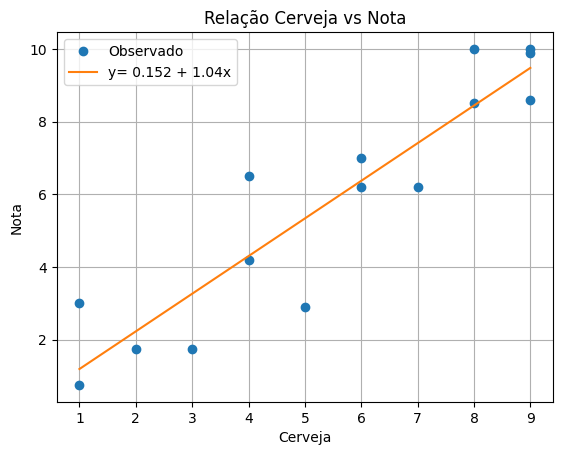

In [17]:
predict = model.predict(X.drop_duplicates())

import matplotlib.pyplot as plt

plt.plot(X['cerveja'], y, 'o')
plt.grid(True)
plt.title("Relação Cerveja vs Nota")
plt.xlabel("Cerveja")
plt.ylabel("Nota")

plt.plot(X.drop_duplicates()['cerveja'], predict)

plt.legend(['Observado', f'y= {a:.3} + {b:.3}x'])

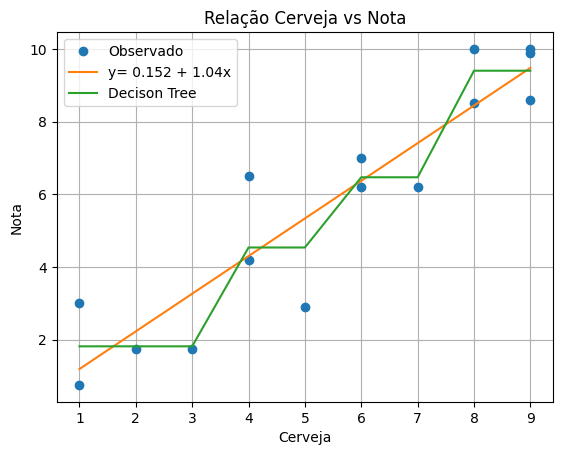

In [22]:
from sklearn import tree

reg = tree.DecisionTreeRegressor(random_state=43, 
                                  max_depth=2)

reg.fit(X, y)
predict_tree = reg.predict(X.drop_duplicates())

plt.plot(X['cerveja'], y, 'o')
plt.grid(True)
plt.title("Relação Cerveja vs Nota")
plt.xlabel("Cerveja")
plt.ylabel("Nota")

plt.plot(X.drop_duplicates()['cerveja'], predict)
plt.plot(X.drop_duplicates()['cerveja'], predict_tree)

plt.legend(['Observado', 
            f'y= {a:.3} + {b:.3}x',
            'Decison Tree'])

[Text(0.5, 0.8333333333333334, 'cerveja <= 5.5\nsquared_error = 9.772\nsamples = 15\nvalue = 5.817'),
 Text(0.25, 0.5, 'cerveja <= 3.5\nsquared_error = 3.126\nsamples = 7\nvalue = 2.979'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.637\nsamples = 4\nvalue = 1.812'),
 Text(0.375, 0.16666666666666666, 'squared_error = 2.216\nsamples = 3\nvalue = 4.533'),
 Text(0.75, 0.5, 'cerveja <= 7.5\nsquared_error = 2.372\nsamples = 8\nvalue = 8.3'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.142\nsamples = 3\nvalue = 6.467'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.484\nsamples = 5\nvalue = 9.4')]

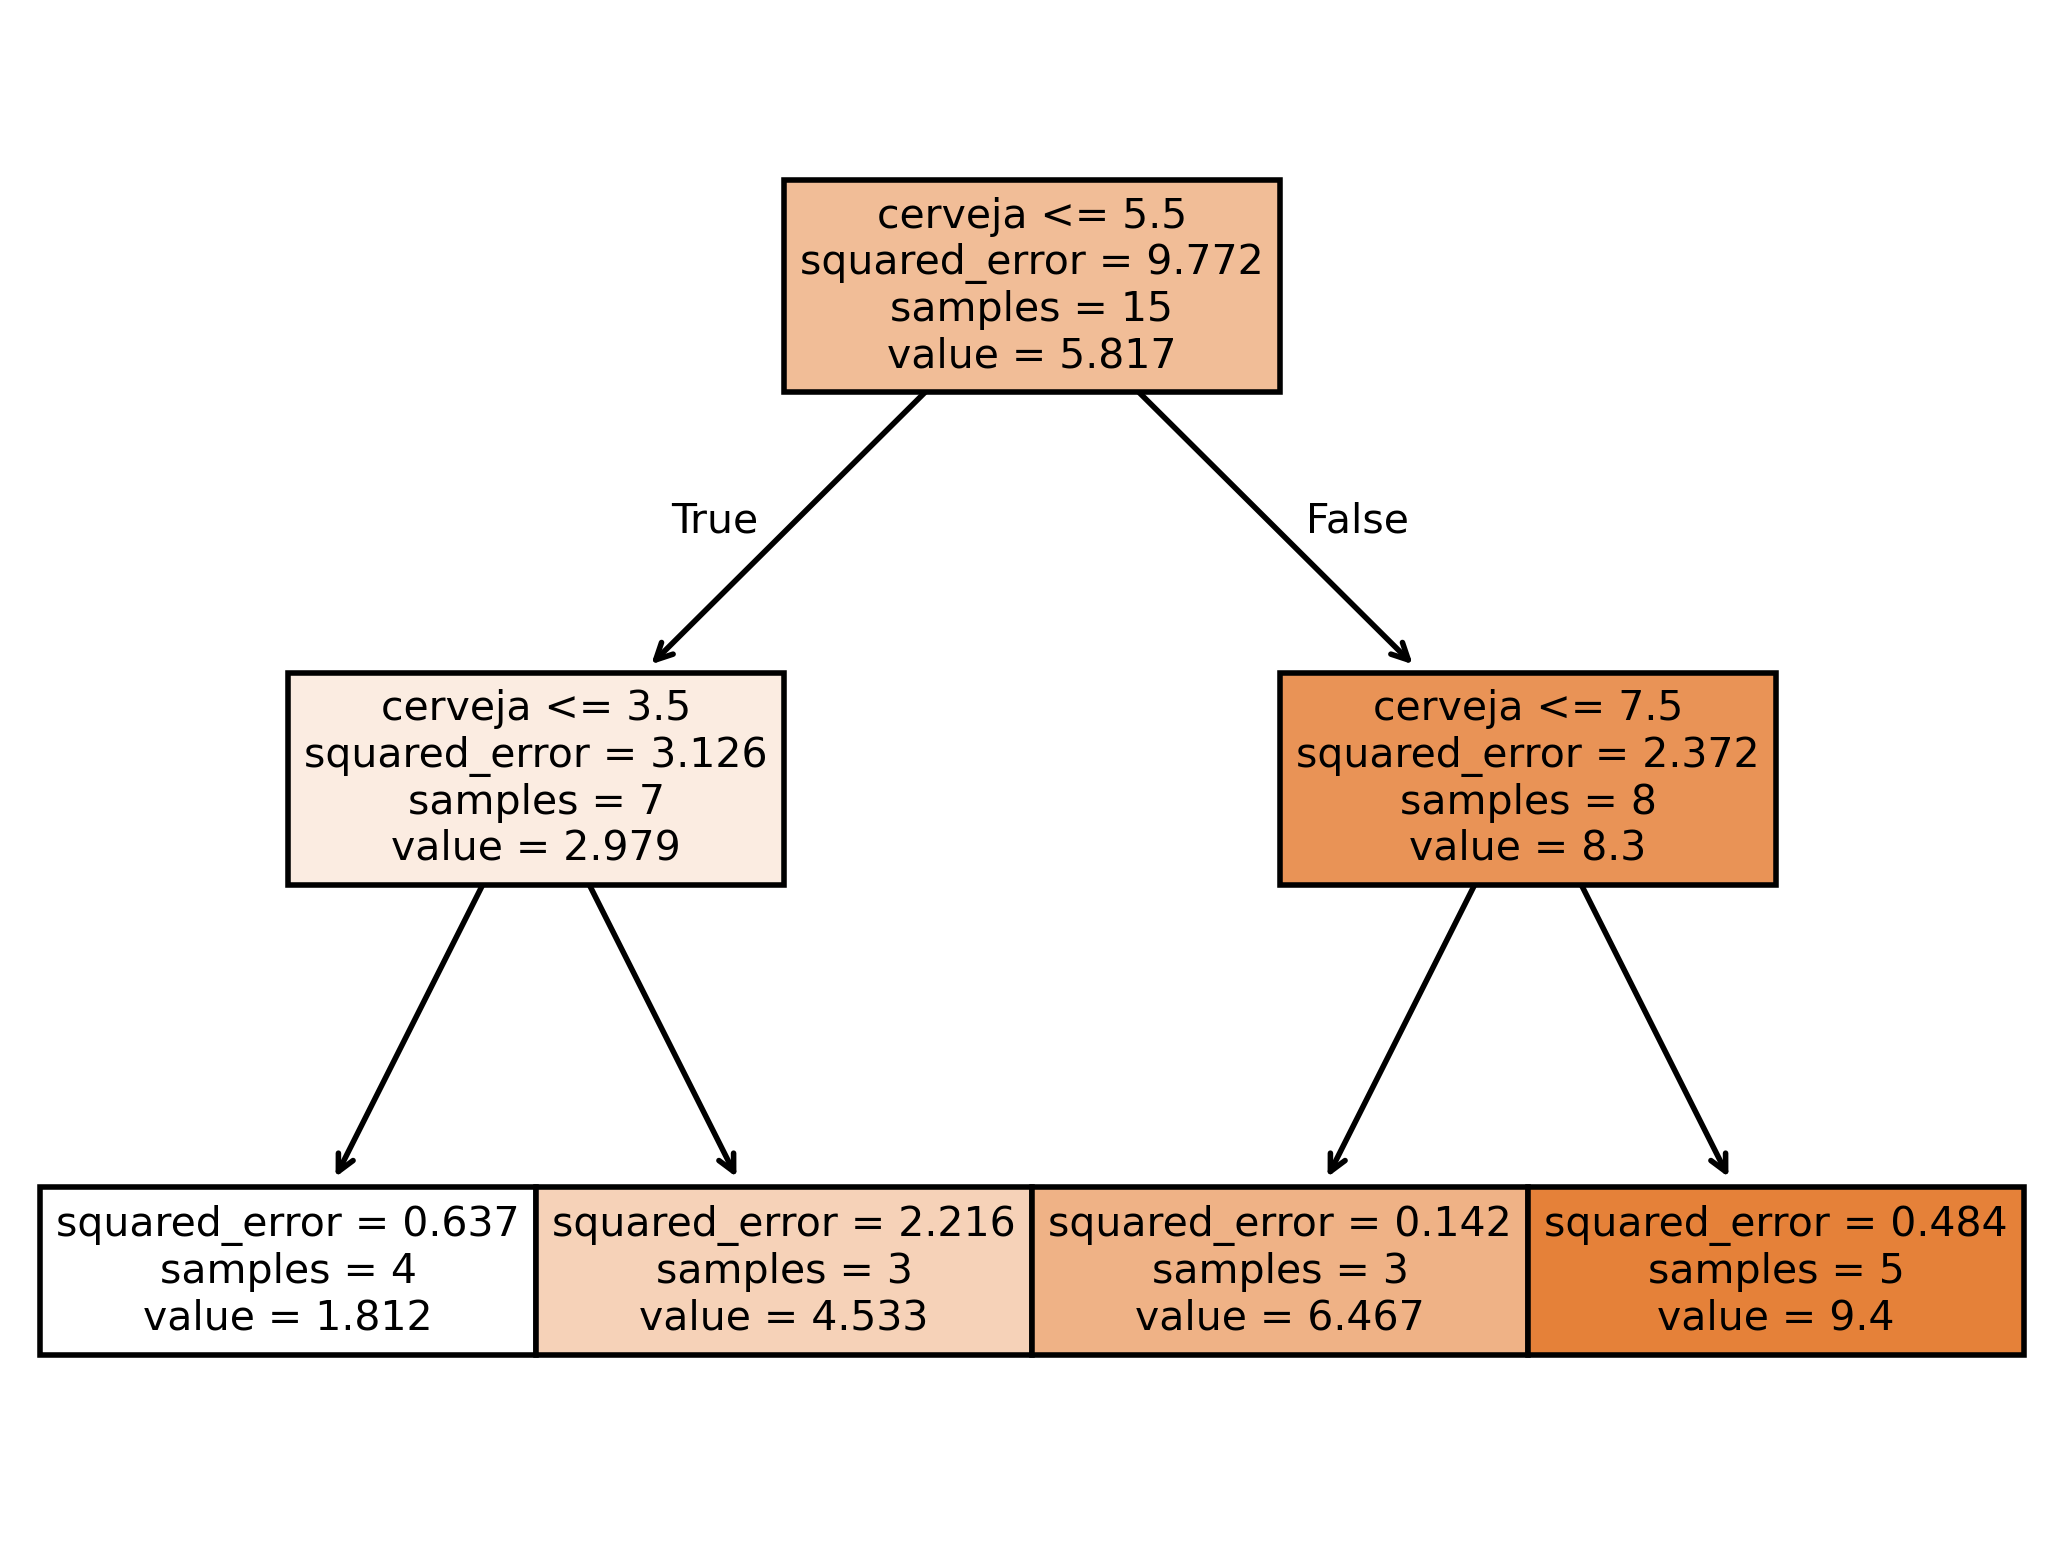

In [23]:
plt.figure(dpi=400)

tree.plot_tree(reg,
               feature_names=['cerveja'],
                filled=True)